# Lab #3

# Momentum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# yi = a*xi + b (and a = -1, b = 2)
x_Data = np.linspace(start=0, stop=20, num=50)
np.random.shuffle(x_Data)
y_Data = -1*x_Data + 2

In [12]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def momentum_GD(x_data, y_data):
    alpha = 0.0001
    gamma = 0.99
    theta0 = theta1 = 0
    m0 = m1 = 0
    pre_error = np.inf

    for i in range(200):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))
        J_Plot.append(J_errorFunc)

        grad_Th0 = np.sum(err_Vec) / x_data.size
        grad_Th1 = np.sum(np.dot(err_Vec, x_data)) / x_data.size

        m0 = gamma*m0 + alpha*grad_Th0
        m1 = gamma*m1 + alpha*grad_Th1

        theta0 = theta0 - m0
        theta1 = theta1 - m1

        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)
        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
            
    return (theta0, theta1)

In [13]:
l0, l1 = momentum_GD(x_data=x_Data, y_data=y_Data)
y_Pre_F = l0 + l1*x_Data

In [14]:
print(J_Plot[0])
print(J_Plot[-1])

49.34693877551021
0.7981740270286068


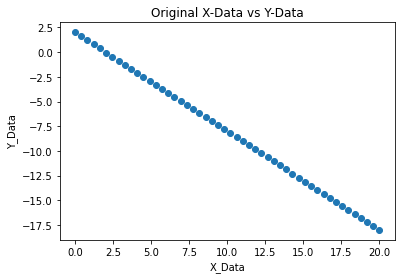

In [15]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

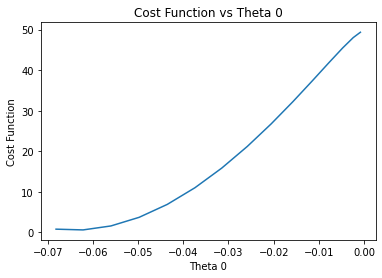

In [16]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

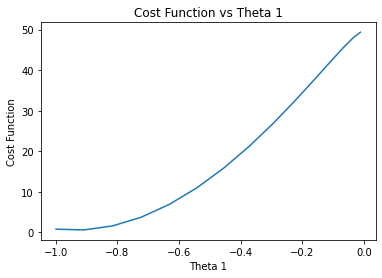

In [17]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

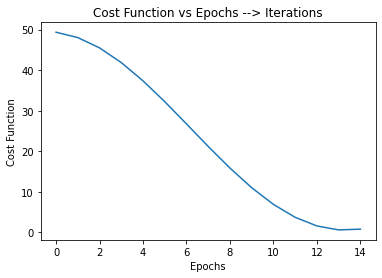

In [18]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

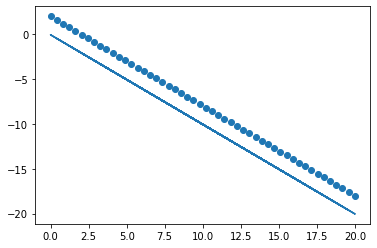

In [19]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [20]:
r2_score(y_Pre_F, y_Data)

0.878299606711111

# NAG

In [27]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def NAG_GD(x_data, y_data):
    alpha = 0.0005
    gamma = 0.29
    theta0 = theta1 = 0
    m0 = m1 = 0
    pre_error = np.inf

    for i in range(200):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))
        J_Plot.append(J_errorFunc)

        theta0Temp = theta0 - gamma*m0
        theta1Temp = theta1 - gamma*m1

        h_theta_temp = theta0Temp + theta1Temp*x_data
        err_Vec_Temp = h_theta_temp - y_data

        if i == 2:
            print(y_Predict)

        grad_Th0_Temp = np.sum(err_Vec_Temp) / x_data.size
        grad_Th1_Temp = np.sum(np.dot(err_Vec_Temp, x_data)) / x_data.size

        theta0 = theta0Temp - alpha*grad_Th0_Temp
        theta1 = theta1Temp - alpha*grad_Th1_Temp

        m0 = gamma*m0 + alpha*grad_Th0_Temp
        m1 = gamma*m1 + alpha*grad_Th1_Temp

        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)

        epoch_Plot.append(i)

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
    
    return (theta0, theta1)

In [28]:
l0, l1 = NAG_GD(x_data=x_Data, y_data=y_Data)
y_Pre_F = l0 + l1*x_Data

[-0.8337118  -2.2257715  -0.62748073 -0.3696919  -0.31813413 -0.26657637
 -0.93682733 -2.32888703 -0.0603453  -2.3804448  -1.86486713 -0.2150186
 -0.88526956 -1.55552053 -0.11190307 -1.7617516  -0.42124967 -1.96798266
 -1.81330936 -1.50396276 -0.57592296 -1.9164249  -2.17421373 -2.12265596
 -1.40084723 -1.34928946 -1.03994286 -0.78215403 -2.5351181  -1.65863606
 -0.00878753 -0.47280743 -0.73059626 -0.5243652  -2.48356033 -1.452405
 -1.71019383 -1.19461616 -1.1430584  -1.24617393 -1.6070783  -1.2977317
 -2.27732926 -0.6790385  -2.01954043 -1.09150063 -0.16346083 -2.0710982
 -0.9883851  -2.43200256]


In [29]:
print(J_Plot[0])
print(J_Plot[-1])
print(y_Data)

49.34693877551021
0.5418761976590338
[ -4.53061224 -15.55102041  -2.89795918  -0.85714286  -0.44897959
  -0.04081633  -5.34693878 -16.36734694   1.59183673 -16.7755102
 -12.69387755   0.36734694  -4.93877551 -10.24489796   1.18367347
 -11.87755102  -1.26530612 -13.51020408 -12.28571429  -9.83673469
  -2.48979592 -13.10204082 -15.14285714 -14.73469388  -9.02040816
  -8.6122449   -6.16326531  -4.12244898 -18.         -11.06122449
   2.          -1.67346939  -3.71428571  -2.08163265 -17.59183673
  -9.42857143 -11.46938776  -7.3877551   -6.97959184  -7.79591837
 -10.65306122  -8.20408163 -15.95918367  -3.30612245 -13.91836735
  -6.57142857   0.7755102  -14.32653061  -5.75510204 -17.18367347]


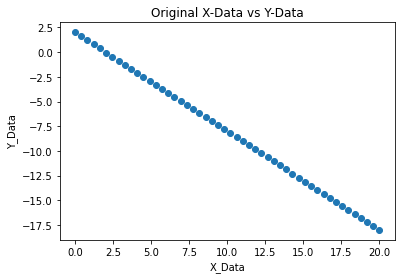

In [10]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

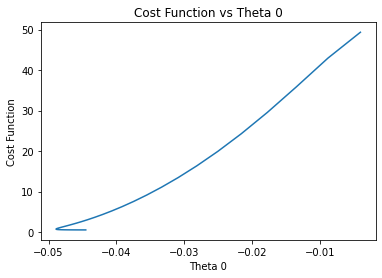

In [11]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

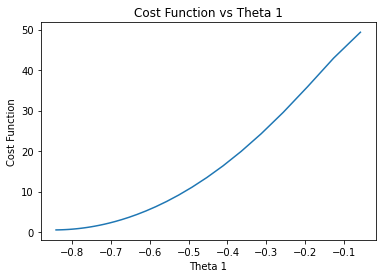

In [12]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

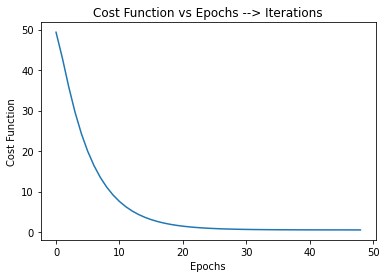

In [13]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

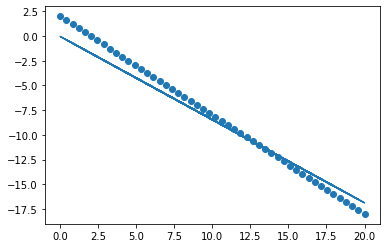

In [14]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [143]:
r2_score(y_Pre_F, y_Data)

0.955979484809847